In [1]:
import matplotlib.pyplot as plt
import numpy as np
from TemporalNetwork import ContTempNetwork
import benchmark_methods

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [218]:
net_heat1 = ContTempNetwork.load('evolving_SBM_net_1activity')

In [228]:
source_nodes = []
target_nodes = []
starting_times = []
ending_times = []

shapshot_size = 1

for i in range(0, int(net_heat1.times[-1]), shapshot_size):
    matrix_snapshot = net_heat1.compute_static_adjacency_matrix(start_time=i, end_time=i+shapshot_size).toarray()
    matrix_snapshot = (matrix_snapshot > 0).astype(int)
    source_nodes_snapshot = np.nonzero(matrix_snapshot)[0]
    target_nodes_snapshot = np.nonzero(matrix_snapshot)[1]
    starting_times_snapshot = [i] * len(source_nodes_snapshot)
    ending_times_snapshot = [i+shapshot_size] * len(source_nodes_snapshot)

    source_nodes += list(source_nodes_snapshot)
    target_nodes += list(target_nodes_snapshot)
    starting_times += starting_times_snapshot
    ending_times += ending_times_snapshot

In [229]:
snapshot_network = ContTempNetwork(source_nodes=source_nodes,
                       target_nodes=target_nodes,
                       starting_times=starting_times,
                       ending_times=ending_times,
                       merge_overlapping_events=True)

PID  2249518  :  merged  10261  events
PID  2249518  :  merged  0  events


In [230]:
snapshot_network.times

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213],
      dtype='int64', name='times', length=214)

In [231]:
snapshot_network.compute_laplacian_matrices(random_walk = False, save_adjacencies=True)

In [232]:
# for snap in snapshot_network.adjacencies:
#     plt.matshow(snap.toarray())

# Laplacian Spectrum Similarity

In [233]:
window_length = 6
n_eigen = 6

In [234]:
#zsc, r = benchmark_methods.laplacian_spectrum_similarity(snapshot_network, window_length=window_length, n_eigen=n_eigen)

In [235]:
#plt.plot(snapshot_network.times[window_length // 2 : len(snapshot_network.times) - window_length // 2 -1], zsc)

# NCPD

In [236]:
#d_gamma, t = benchmark_methods.NCPD(snapshot_network.adjacencies, window_length=window_length, n_eigen=n_eigen)

In [237]:
#plt.plot(snapshot_network.times[t], d_gamma)

# CUMSUM

In [289]:
window_length = 30

In [290]:
Y, t = benchmark_methods.CUMSUM(snapshot_network.adjacencies, window_length=window_length)

In [291]:
t

array([ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,
        86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110,
       112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
       138, 140, 142, 144, 146, 148, 150, 152])

In [292]:
Y

[17.09473216391983,
 17.221194044182027,
 17.31696541891858,
 17.299376041208724,
 17.31007892203432,
 17.495408816123625,
 17.642301351934815,
 17.837284666670413,
 18.083779015068647,
 18.27955601171726,
 18.521196739219384,
 18.596817163239827,
 18.612845222784927,
 18.754768701469033,
 18.94526645975749,
 19.213600867821615,
 19.48417444141268,
 19.967256398555584,
 20.238216553161717,
 20.14564270021267,
 20.23824017830472,
 20.225126555720216,
 20.398808311680746,
 20.547979453164416,
 20.363412944949616,
 20.50740427761784,
 20.691635358425287,
 20.71579867338135,
 20.563388428277285,
 20.603241872045523,
 20.33318508259478,
 20.282114123154265,
 20.138319060775757,
 20.010245031163095,
 19.927834626430027,
 19.810308017119233,
 19.619742042158926,
 19.463413205535254,
 19.331759359273953,
 19.359621295595137,
 19.340967838282467,
 19.31515091877505,
 19.271913213174262,
 19.357318119010607,
 19.33496051685251,
 19.138698717682825]

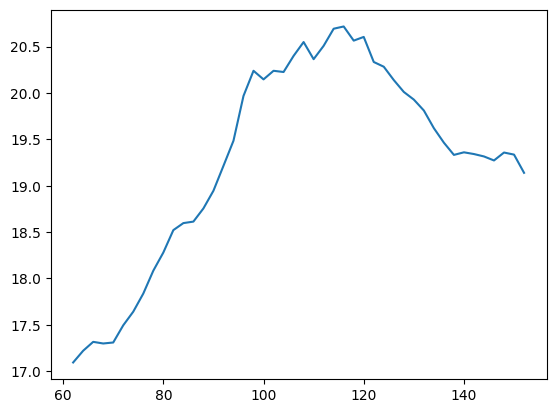

In [293]:
plt.plot(snapshot_network.times[t][1:], Y)

# CUMSUM 2

In [339]:
window_length=10

In [340]:
stat, t = benchmark_methods.CUMSUM_2(snapshot_network.adjacencies, window_length=2*window_length)

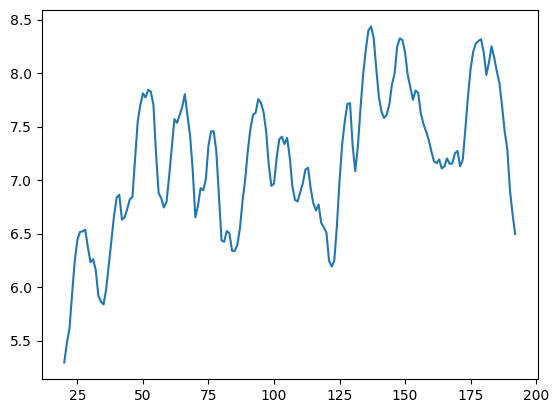

In [341]:
plt.plot(snapshot_network.times[t], stat)

# Average Frobenius Distance

In [378]:
window_length = 5

In [379]:
frob_dist, t_frob = benchmark_methods.avg_frobenius_distance(snapshot_network.adjacencies, window_length=window_length)

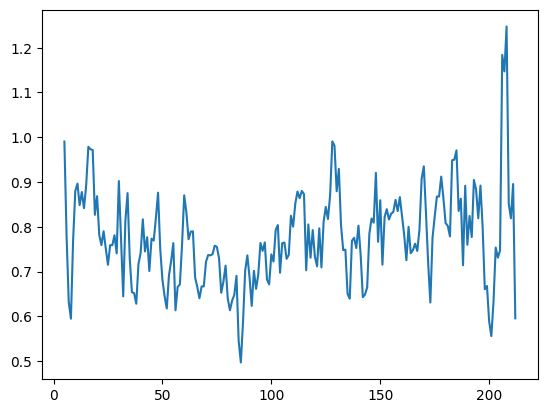

In [380]:
plt.plot(snapshot_network.times[t_frob], frob_dist)

# Avg Proctures Distance

In [381]:
window_length=10

In [382]:
proc_dist, t_proc = benchmark_methods.avg_procrustes_distance(snapshot_network.adjacencies, window_length=window_length)

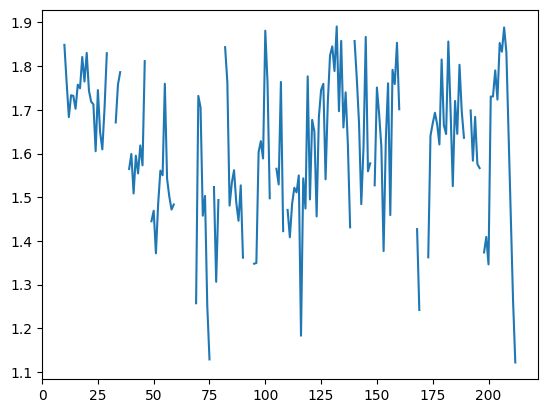

In [383]:
plt.plot(snapshot_network.times[t_proc], proc_dist)